In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Load CIFAR-10 data
(train_images,train_labels),(test_images,test_labels)= cifar10.load_data()

In [13]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 10

In [14]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize data
train_images = train_images / 255
test_images = test_images / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((train_images, test_images), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [15]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])
  
  # model.summary()
     # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
  
    # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
1080/1080 [==============================] - 10s 9ms/step - loss: 1.5328 - accuracy: 0.4496
Epoch 2/5
1080/1080 [==============================] - 10s 9ms/step - loss: 1.1193 - accuracy: 0.6028
Epoch 3/5
1080/1080 [==============================] - 10s 9ms/step - loss: 0.9554 - accuracy: 0.6647
Epoch 4/5
1080/1080 [==============================] - 10s 9ms/step - loss: 0.8349 - accuracy: 0.7074
Epoch 5/5
1080/1080 [==============================] - 10s 9ms/step - loss: 0.7377 - accuracy: 0.7416
Score for fold 1: loss of 0.8589721918106079; accuracy of 69.73333358764648%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
1080/1080 [==============================] - 10s 9ms/step - loss: 1.5728 - accuracy: 0.4194
Epoch 2/5
1080/1080 [==============================] - 10s 9ms/step - loss: 1.1372 - accuracy: 0.5928
Epoch 3/5
1080/

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.8589721918106079 - Accuracy: 69.73333358764648%


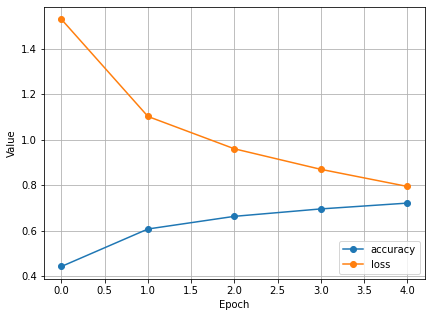

------------------------------------------------------------------------
> Fold 2 - Loss: 0.9340410828590393 - Accuracy: 67.63333082199097%


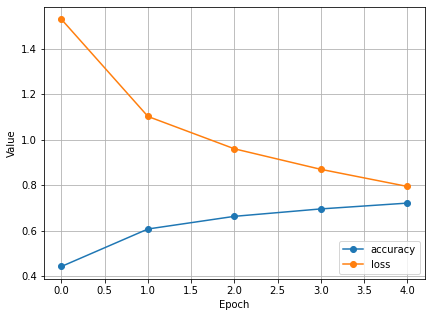

------------------------------------------------------------------------
> Fold 3 - Loss: 0.9229698777198792 - Accuracy: 68.96666884422302%


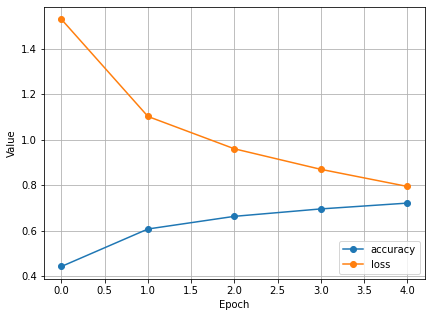

------------------------------------------------------------------------
> Fold 4 - Loss: 0.953440248966217 - Accuracy: 66.44999980926514%


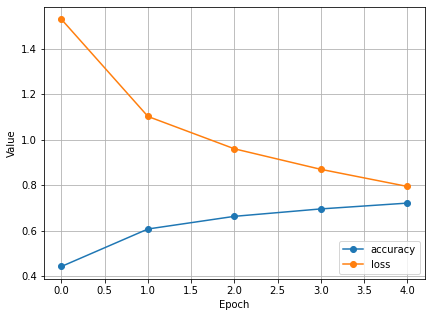

------------------------------------------------------------------------
> Fold 5 - Loss: 0.8920504450798035 - Accuracy: 69.31666731834412%


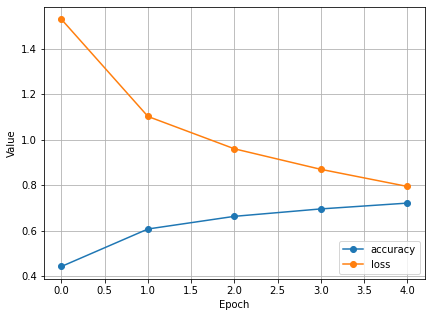

------------------------------------------------------------------------
> Fold 6 - Loss: 0.920131266117096 - Accuracy: 68.19999814033508%


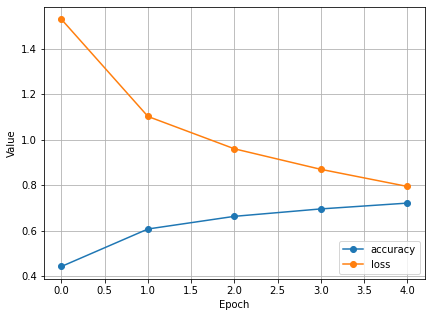

------------------------------------------------------------------------
> Fold 7 - Loss: 0.9941356778144836 - Accuracy: 65.2833342552185%


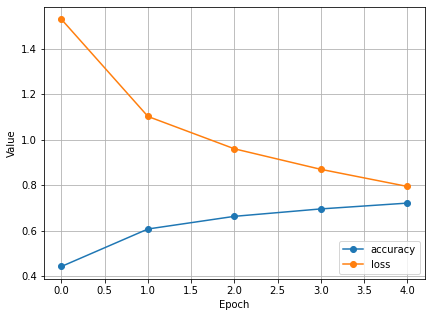

------------------------------------------------------------------------
> Fold 8 - Loss: 0.9625597596168518 - Accuracy: 67.00000166893005%


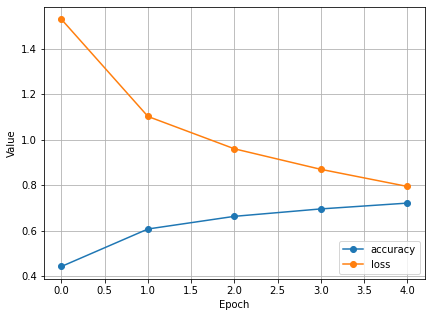

------------------------------------------------------------------------
> Fold 9 - Loss: 0.9331673383712769 - Accuracy: 68.15000176429749%


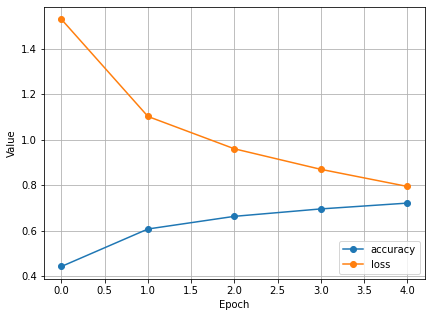

------------------------------------------------------------------------
> Fold 10 - Loss: 0.9233679175376892 - Accuracy: 67.78333187103271%


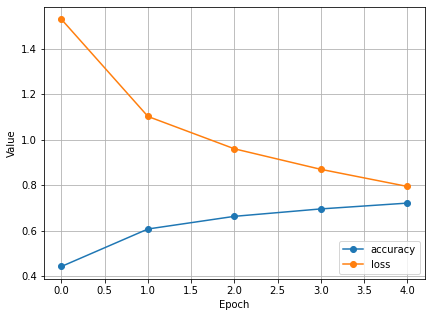

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 67.85166680812836 (+- 1.2837110508784262)
> Loss: 0.9294835805892945
------------------------------------------------------------------------


In [16]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
   
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], 'o-', label='accuracy')
    plt.plot(history.history['loss'], 'o-', label='loss')
    #plt.plot(fold_no['KFold'], 'o-', label = 'loss_per_fold')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

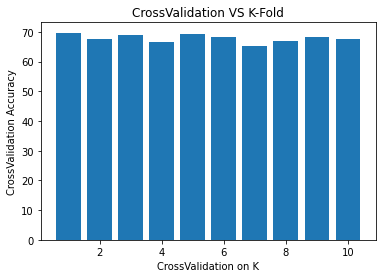

In [17]:
import matplotlib.pyplot as plt
   
Kth_Fold=[]
for i in range(num_folds):
    Kth_Fold.append(i+1)
Cross_Val_Acc = acc_per_fold

plt.bar(Kth_Fold, Cross_Val_Acc)
plt.title('CrossValidation VS K-Fold')
plt.xlabel('CrossValidation on K')
plt.ylabel('CrossValidation Accuracy')
plt.show()

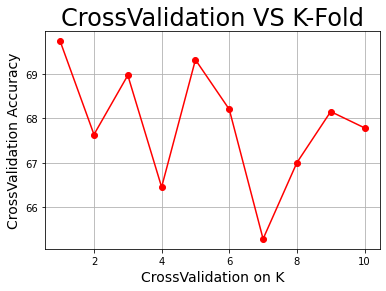

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
   
Data = {'Kth_Fold': Kth_Fold,
        'Cross_Val_Acc': Cross_Val_Acc
       }
  
df = pd.DataFrame(Data,columns=['Kth_Fold','Cross_Val_Acc'])
  
plt.plot(df['Kth_Fold'], df['Cross_Val_Acc'], color='red', marker='o')
plt.title('CrossValidation VS K-Fold', fontsize=24)
plt.xlabel('CrossValidation on K', fontsize=14)
plt.ylabel('CrossValidation Accuracy', fontsize=14)
plt.grid(True)
plt.show()